# JIVE demonstration

This notebook deomonstrations some of the JIVE functionality. The notebook assumes the reader has knowledge of JIVE and is looking to understand the basic functionality of this particular python implementaion.

In [1]:
from jive.Jive import Jive

# other optional imports
from jive.jive_visualization import plot_data_blocks,plot_jive_full_estimates

import numpy as np
from __future__ import print_function 

# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Load toy data

In [2]:
X = np.load('data/toy_ajive_fig2_x.npy')
Y = np.load('data/toy_ajive_fig2_y.npy')

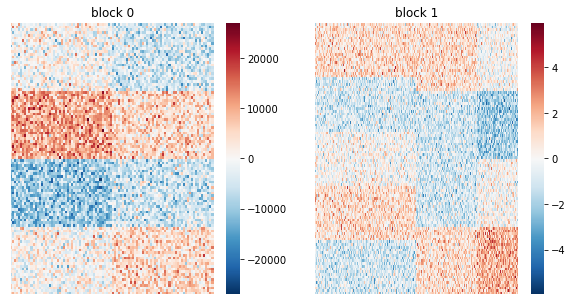

In [3]:
plot_data_blocks([X, Y])

# 1. Compute JIVE decomposition

In [4]:
blocks = [X, Y]
init_svd_ranks = None
wedin_estimate = True
save_full_final_decomp = True
show_scree_plot = True

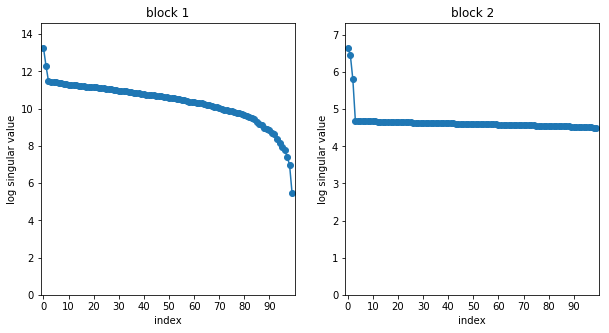

In [5]:
jive = Jive(blocks,
            init_svd_ranks,
            wedin_estimate,
            save_full_final_decomp,
            show_scree_plot)

### User selects the signal ranks for each data matrix

probably based on the above scree plot, however the user does have the option to use other methods to select the signal ranks

In [6]:
# user selects
jive.set_signal_ranks([2, 3])

### After selecting signal ranks can now compute the JIVE estimates

In [7]:
# grab jive estimates
block_estimates = jive.get_block_estimates()
joint_space = jive.get_joint_space_estimate()

## jive computes a lot of data

below is some of the data jive computes by default

In [8]:
# esimated full joint, individual and noise blocks
J_x = block_estimates[0]["joint"]["full"]
I_x = block_estimates[0]["individual"]["full"]
E_x = block_estimates[0]["noise"]

J_y = block_estimates[1]["joint"]["full"]
I_y = block_estimates[1]["individual"]["full"]
E_y = block_estimates[1]["noise"]

In [9]:
# estimated ranks
indiv_rank_x = block_estimates[0]["individual"]['rank']
indiv_rank_y = block_estimates[1]["individual"]['rank']
joint_rank = block_estimates[0]["joint"]['rank']

In [10]:
# SVDs of J and I matrix
J_x_u = block_estimates[0]["joint"]["scores"]
J_x_d = block_estimates[0]["joint"]["sing_vals"]
J_x_v = block_estimates[0]["joint"]["loadings"]

I_x_u = block_estimates[0]["individual"]["scores"]
I_x_d = block_estimates[0]["individual"]["sing_vals"]
I_x_v = block_estimates[0]["individual"]["loadings"]

In [11]:
# SVD of the joint scores
joint_scores_u = joint_space["scores"]
joint_scores_d = joint_space["sing_vals"]
joint_scores_v = joint_space["loadings"]

### visualize JIVE full estimates

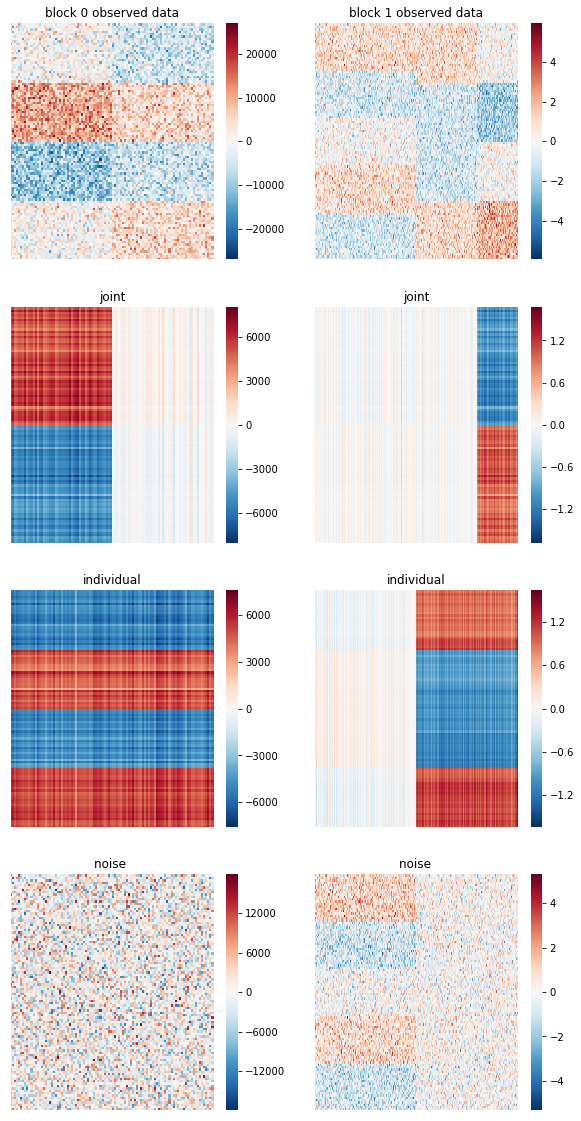

In [12]:
plot_jive_full_estimates(jive)

# 2. User can manually set the joint space rank

If **wedin_estimate=False** then JIVE will not automatically select the joint signal rank based on the wedin bound. The user then is required to select the joint signal rank themselves with the function **jive.jive.set_joint_rank()**.

In [13]:
wedin_estimate = False # don't automatically select the joint space rank with the wedin bound

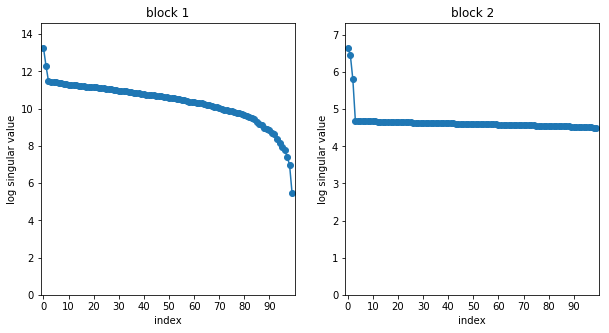

In [14]:
jive = Jive(blocks,
            init_svd_ranks,
            wedin_estimate,
            save_full_final_decomp,
            show_scree_plot)

jive.set_signal_ranks([2, 3])

# user selecets the joint space rank
jive.set_joint_rank(2)

In [15]:
joint_space = jive.get_joint_space_estimate()
print('joint space rank: %d' % joint_space['scores'].shape[1])

joint space rank: 2


# Option to not automatically store the J, I, E matrices to save memory

Setting **full=False** will stop JIVE from automatically storing the full J, I, E matrices. This may be desirable when the data sets are large. JIVE does store the SVD of J and I so the user can request the full matrices if so desired with the **jive.get_block_estimates_full()** function.

In [16]:
save_full_final_decomp = False

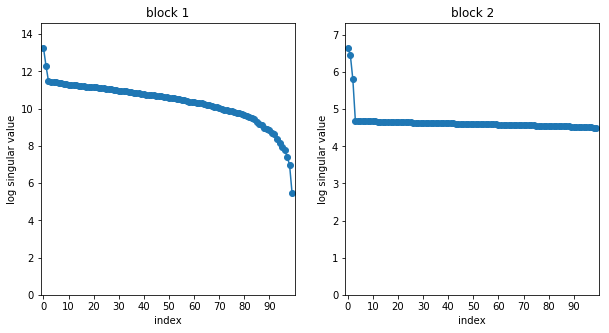

In [17]:
wedin_estimate = True

jive = Jive(blocks,
            init_svd_ranks,
            wedin_estimate,
            save_full_final_decomp,
            show_scree_plot)


jive.set_signal_ranks([2, 3])
block_estimates = jive.get_block_estimates()

In [18]:
# each of J, I, E are now empty arrays
J = block_estimates[0]["joint"]["full"]
J

matrix([], shape=(1, 0), dtype=float64)

In [19]:
# compute the full block estimtes with the stored SVDs
full_block_estimates = jive.get_block_estimates_full() 

# we now have the full J matrix
J = full_block_estimates[0]['J']
J.shape

(100, 100)